In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import quandl
from fbprophet import Prophet

In [46]:
df = pd.read_csv('/home/alvin/Desktop/Python/data/AMZN.csv', index_col=0)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,81.500000,89.562500,79.046875,89.375000,89.375000,16117600
2000-01-04,85.375000,91.500000,81.750000,81.937500,81.937500,17487400
2000-01-05,70.500000,75.125000,68.000000,69.750000,69.750000,38457400
2000-01-06,71.312500,72.687500,64.000000,65.562500,65.562500,18752000
2000-01-07,67.000000,70.500000,66.187500,69.562500,69.562500,10505400
...,...,...,...,...,...,...
2020-05-20,2477.870117,2500.010010,2467.270020,2497.939941,2497.939941,3998100
2020-05-21,2500.000000,2525.449951,2442.540039,2446.739990,2446.739990,5114400
2020-05-22,2455.010010,2469.850098,2430.129883,2436.879883,2436.879883,2867100


In [47]:
df=df[['Adj Close']]
df.reset_index(drop=False, inplace=True)
df.rename(columns={'Date':'ds', 'Adj Close':'y'}, inplace=True)
df.ds = pd.to_datetime(df.ds)
df

/home/alvin/.local/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/alvin/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2000-01-03,89.375000
1,2000-01-04,81.937500
2,2000-01-05,69.750000
3,2000-01-06,65.562500
4,2000-01-07,69.562500
...,...,...
5127,2020-05-20,2497.939941
5128,2020-05-21,2446.739990
5129,2020-05-22,2436.879883
5130,2020-05-26,2421.860107


In [51]:
train_indices = df.ds.apply(lambda x: x.year) < 2020
df_train = df.loc[train_indices].dropna()
df_test = df.loc[-train_indices].reset_index(drop=True)

In [52]:
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='montly', period = 30.5, fourier_order=5)
model_prophet.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


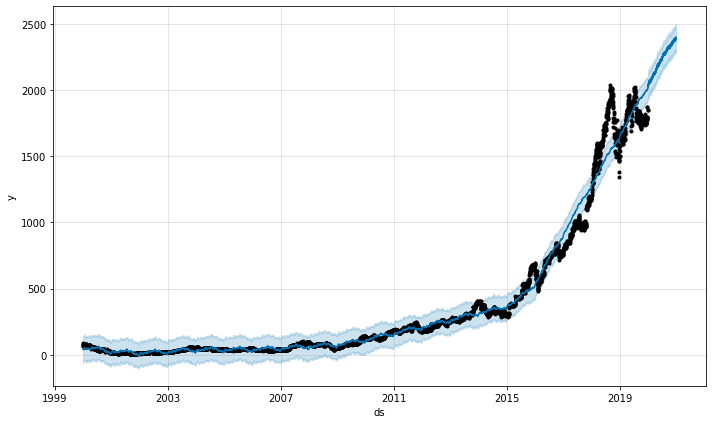

In [53]:
df_future = model_prophet.make_future_dataframe(periods=365)
df_pred = model_prophet.predict(df_future)
model_prophet.plot(df_pred)

plt.tight_layout()

plt.show()

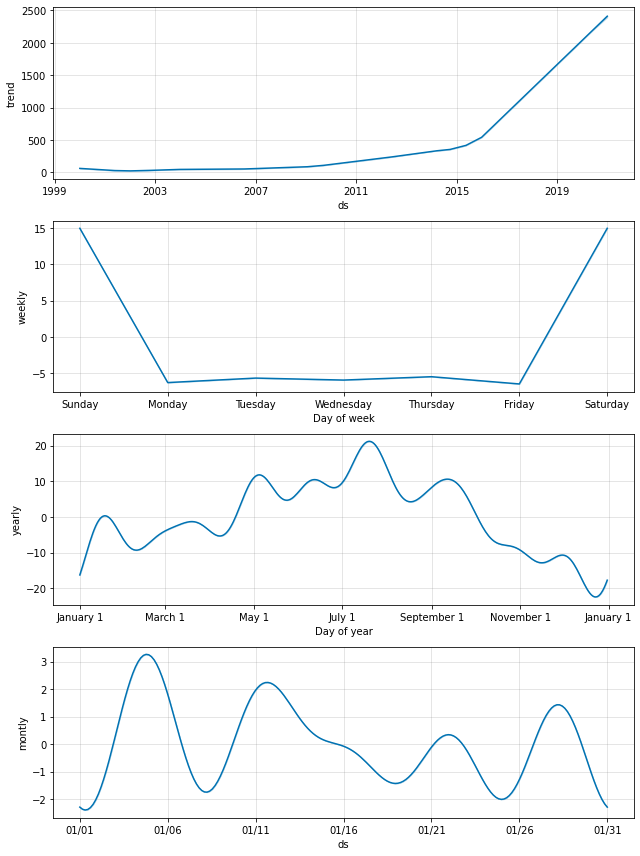

In [32]:
model_prophet.plot_components(df_pred)
plt.tight_layout()

plt.show()

In [54]:
selected_columns = ['ds', 'yhat_lower', 'yhat_upper', 'yhat']

df_pred = df_pred.loc[:, selected_columns].reset_index(drop=True)
df_test = df_test.merge(df_pred, on=['ds'], how='left')
df_test.ds = pd.to_datetime(df_test.ds)
df_test.set_index('ds', inplace=True)

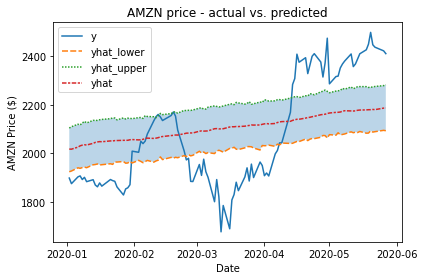

In [57]:
fig, ax = plt.subplots(1, 1)

ax = sns.lineplot(data=df_test[['y', 'yhat_lower', 
                                'yhat_upper', 'yhat']])
ax.fill_between(df_test.index,
                df_test.yhat_lower,
                df_test.yhat_upper,
                alpha=0.3)
ax.set(title='AMZN price - actual vs. predicted',
       xlabel='Date',
       ylabel='AMZN Price ($)')

plt.tight_layout()
plt.show()